In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Variable Level Monitoring for Categorical Features (VLM_C)
##### This code is used to create variable level monitoring for categorical features.
- Table shows unique values of the monitored feature by date
- Plot shows percentage of records within each category of the monitored feature by date

In [11]:
def VLM_C(df, feature_col, date_col, figsize=(15,5)):
    
# Parameter Instruction
    # df: Pandas DataFrame; DataFrame with date_col and feature_col
    # feature_col: str; Name of column with feature to monitor
    # date_col: str; Name of date column
    # -------------------------------------------
# Output
    # One table & One plot
    
    title_u = "Unique Category of {f}".format(f=feature_col)
    title_c = "# of Records per day within each category of {f}".format(f=feature_col)
    title_d = "# of Records per day of {f}".format(f=feature_col)
    title_p = "% of Records per day within each category of {f}".format(f=feature_col)
    
    df[feature_col] = df[feature_col].astype(str)
    unique = pd.DataFrame(df.groupby(date_col)[feature_col].unique().reset_index(name = title_u))
    unique = pd.DataFrame(unique[title_u].map(lambda x: sorted(x)))
    
    count_c = pd.DataFrame(df.groupby([date_col, feature_col])[feature_col].count().reset_index(name = title_c))
    count_d = pd.DataFrame(df.groupby(date_col)[feature_col].count().reset_index(name = title_d))
    count = count_c.merge(count_d, how='left', left_on = 'Date', right_on = 'Date')
    count[title_p] = 100*count[title_c]/count[title_d]
    percent = count.pivot(values = title_p, index=date_col, columns = feature_col)
    percent.reset_index(inplace = True)
    
    plt.figure(figsize=(15,5))
    for column in percent:
        if column != date_col:
            plt.plot(percent[date_col], percent[column])
            plt.legend()
            plt.title(title_p)
            plt.ylabel('% of records')
            plt.xlabel('Date')
    
    return unique

##### Example

In [2]:
df = pd.read_csv("DATA/VLM_C.csv")
df

,Date,Feature_C
0,11/1/2018,A
1,11/1/2018,A
2,11/1/2018,B
3,11/1/2018,B
4,11/2/2018,A
5,11/2/2018,B
6,11/2/2018,B
7,11/2/2018,B
8,11/3/2018,B
9,11/3/2018,A


,Unique Category of Feature_C
0,"[A, B]"
1,"[A, B]"
2,"[A, B]"
3,"[A, B, C]"
4,"[A, B, C]"


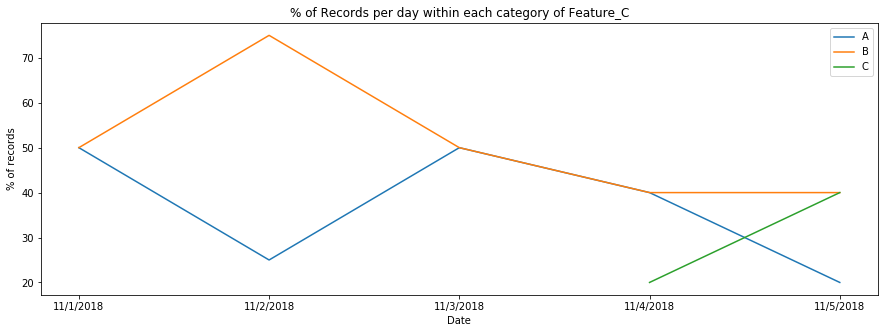

In [12]:
VLM_C(df = df
     ,feature_col = 'Feature_C'
     ,date_col = 'Date')